## Import Libraries and read data

In [58]:
# Import manipulation libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore Warning library
import warnings

# Preprocessing libraries
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

In [3]:
# Ignore certain warnings when plotting
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [4]:
# Import data from csv
test_values = pd.read_csv('test_values.csv')
train_labels = pd.read_csv('train_labels.csv')
train_values = pd.read_csv('train_values.csv')

In [5]:
# View test data
test_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# View training labels
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [7]:
# View training values
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Merge training datasets to have 1 df
df = pd.merge(train_values, train_labels, on='building_id')

## Data Cleaning

In [24]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [10]:
# Check for amount of duplicated data
df.duplicated().sum()

0

In [11]:
# Check the amount of null values in each columns
df.isnull().sum() / len(df) * 100

building_id                               0.0
geo_level_1_id                            0.0
geo_level_2_id                            0.0
geo_level_3_id                            0.0
count_floors_pre_eq                       0.0
age                                       0.0
area_percentage                           0.0
height_percentage                         0.0
land_surface_condition                    0.0
foundation_type                           0.0
roof_type                                 0.0
ground_floor_type                         0.0
other_floor_type                          0.0
position                                  0.0
plan_configuration                        0.0
has_superstructure_adobe_mud              0.0
has_superstructure_mud_mortar_stone       0.0
has_superstructure_stone_flag             0.0
has_superstructure_cement_mortar_stone    0.0
has_superstructure_mud_mortar_brick       0.0
has_superstructure_cement_mortar_brick    0.0
has_superstructure_timber         

In [12]:
# Define anomaly detection visualization function
def anomaly_detection(data, columns):
    # Univariate columns
    if columns[0] == 'geo_level_1_id':
        for col in columns:
            plt.figure(figsize=(10,6))
            sns.boxplot(data=data, x=col)
            plt.title(f'Feature: {col}');
    elif columns[0] == 'land_surface_condition':
        data_encoded = pd.get_dummies(data, columns=columns, dtype=int)
        for col in [col for col in data_encoded.columns if col not in data.columns]:
            plt.figure(figsize=(10,6))
            sns.kdeplot(data_encoded[col], fill=True, warn_singular=False)
            plt.title(f'Feature: {col}');
    elif columns[0] == 'has_superstructure_adobe_mud':
        for col in columns:
            plt.figure(figsize=(10,6))
            sns.histplot(data=data, x=col, stat='count')
            plt.title(f'Feature: {col}');

In [13]:
# Lambda function to deal with string issues for columns
col_trans = lambda x: x.replace(',','').split()

In [14]:
# Defining Univariate columns
uni_st = 'geo_level_1_id, geo_level_2_id, geo_level_3_id, count_floors_pre_eq, age, area_percentage, height_percentage, count_families'
uni_cols = col_trans(uni_st)

In [15]:
# Defining Categorical Columns
cat_st = 'land_surface_condition, foundation_type, roof_type, ground_floor_type, other_floor_type, position, plan_configuration, legal_ownership_status'
cat_cols = col_trans(cat_st)

In [16]:
# Defining binary columns
binary_st = 'has_superstructure_adobe_mud, has_superstructure_mud_mortar_stone, has_superstructure_stone_flag, has_superstructure_cement_mortar_stone, has_superstructure_mud_mortar_brick, has_superstructure_cement_mortar_brick, has_superstructure_timber, has_superstructure_bamboo, has_superstructure_rc_engineered, has_superstructure_other, has_secondary_use_hotel, has_secondary_use_rental, has_secondary_use_institution, has_secondary_use_school, has_secondary_use_industry, has_secondary_use_health_post, has_secondary_use_gov_office, has_secondary_use_use_police, has_secondary_use_other'
binary_cols = col_trans(binary_st)

### Categorical Anomaly Detection

In [ ]:
# Univariant columns anomaly detection
anomaly_detection(data=df, columns=cat_cols)

### Univariate Anomaly Detection

In [ ]:
anomaly_detection(data=df, columns=uni_cols)

### Binary Anomaly Detection

In [ ]:
anomaly_detection(data=df, columns=binary_cols)

## Data Transformation

### Scaling Univariate data

In [45]:
# Function to view skewness of univariate data
def skew_vis(data, columns):
    for feat in columns:
        plt.figure(figsize=(10,6))
        sns.histplot(data=data[feat], bins=150)
        plt.title(f'Dist of Feature: {feat}')


In [33]:
# Robust scaling function
def robust_scaling(data, columns):
    rb_scaler = RobustScaler()
    rb_scaler.fit(data[columns])
    scaled = rb_scaler.transform(data[columns])
    return scaled

In [34]:
# Standard Scaling function
def standard_scaling(data, columns):
    st_scaler = StandardScaler()
    st_scaler.fit(data[columns])
    scaled = st_scaler.transform(data[columns])
    return scaled

In [52]:
# MinMax Scaling function
def min_max_scaling(data, columns):
    mm_scaler = MinMaxScaler()
    mm_scaler.fit(data[columns])
    scaled = mm_scaler.transform(data[columns])
    return scaled

In [51]:
# Check minimum and maximum of each column 
for col in uni_cols:
    print(f'Maximum in column: {col}, {df[col].max()}')
    print(f'Minimum in column: {col}, {df[col].min()}')

Maximum in column: geo_level_1_id, 30
Minimum in column: geo_level_1_id, 0
Maximum in column: geo_level_2_id, 1427
Minimum in column: geo_level_2_id, 0
Maximum in column: geo_level_3_id, 12567
Minimum in column: geo_level_3_id, 0
Maximum in column: count_floors_pre_eq, 9
Minimum in column: count_floors_pre_eq, 1
Maximum in column: age, 995
Minimum in column: age, 0
Maximum in column: area_percentage, 100
Minimum in column: area_percentage, 1
Maximum in column: height_percentage, 32
Minimum in column: height_percentage, 2
Maximum in column: count_families, 9
Minimum in column: count_families, 0


In [55]:
# Transforming univariate column into scaled version
df_rb_scaled = pd.DataFrame(robust_scaling(df, uni_cols), columns=uni_cols)
df_st_scaled = pd.DataFrame(standard_scaling(df, uni_cols), columns=uni_cols)
df_mm_scaled = pd.DataFrame(min_max_scaling(df, uni_cols), columns=uni_cols)

#### Regular data Skewness

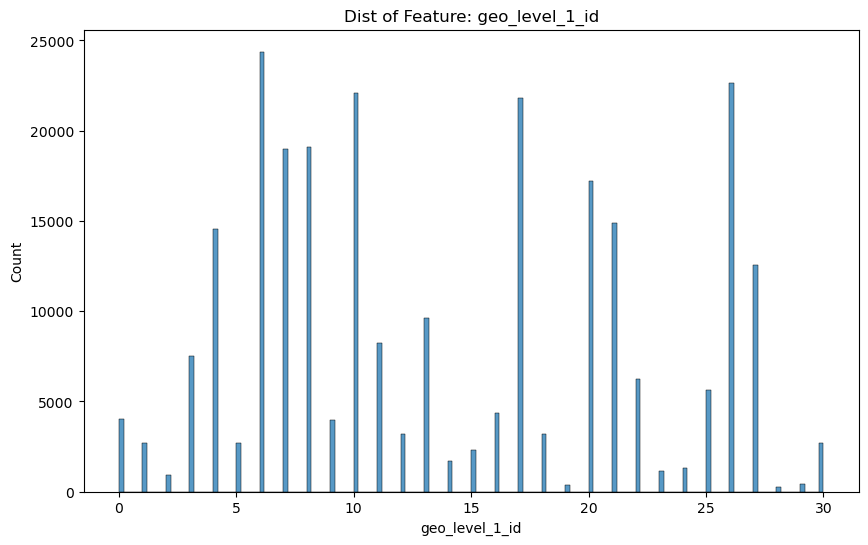

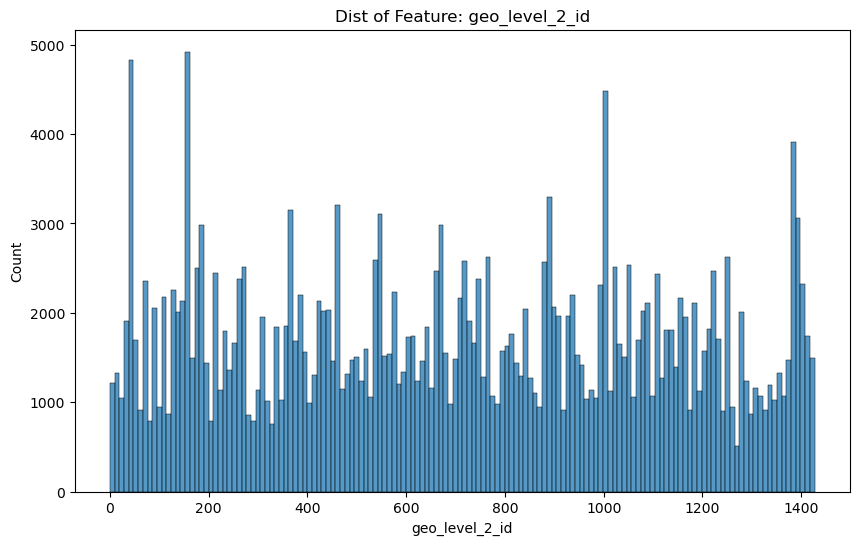

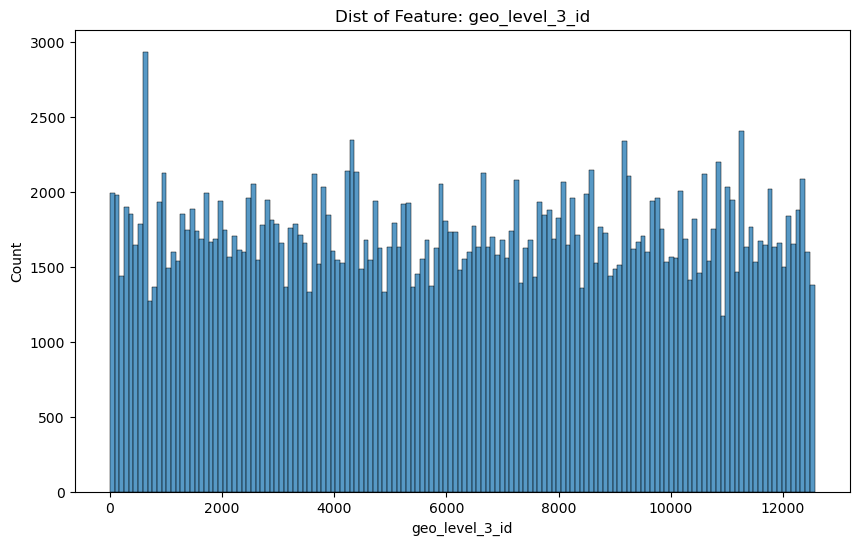

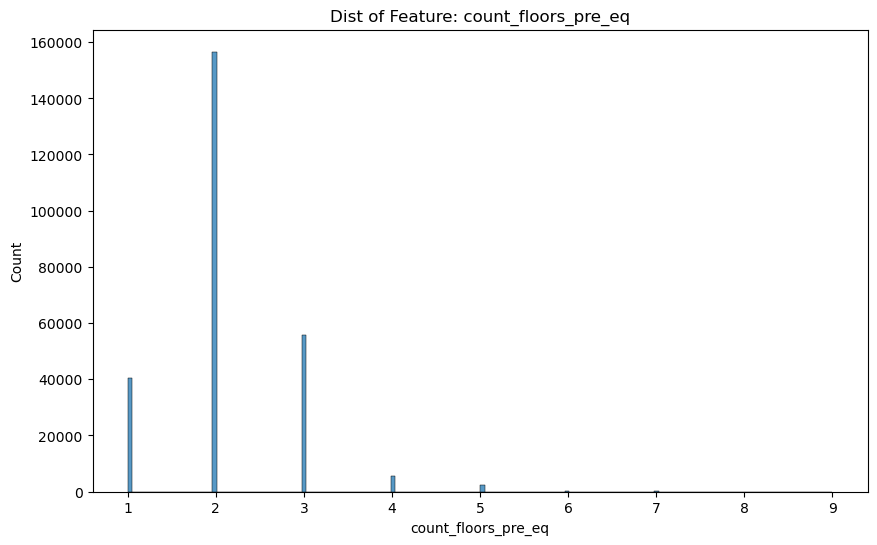

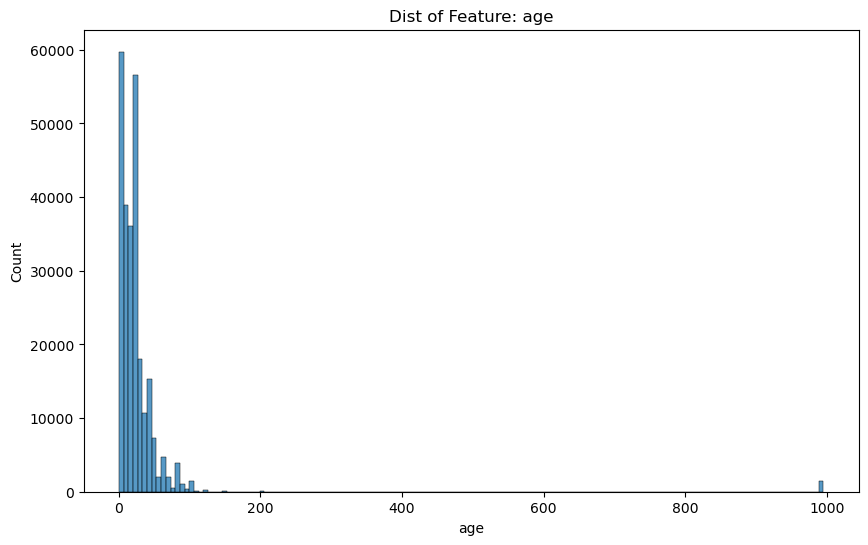

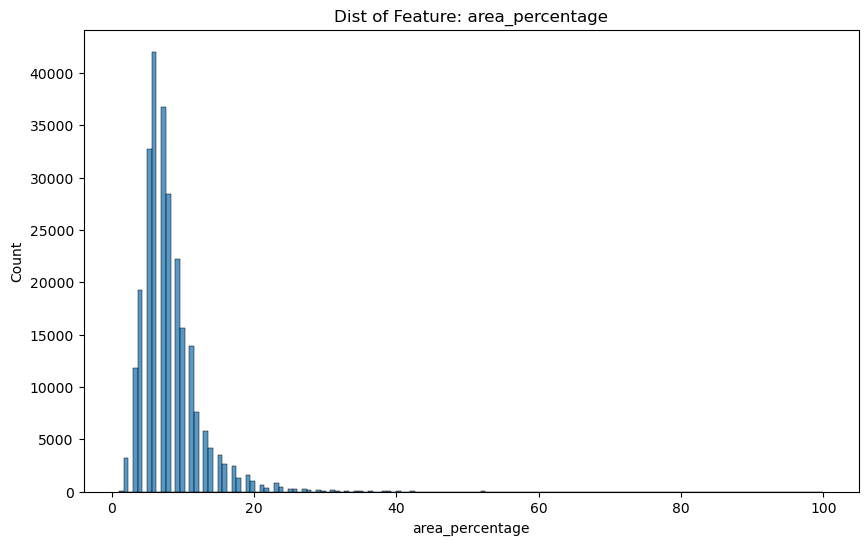

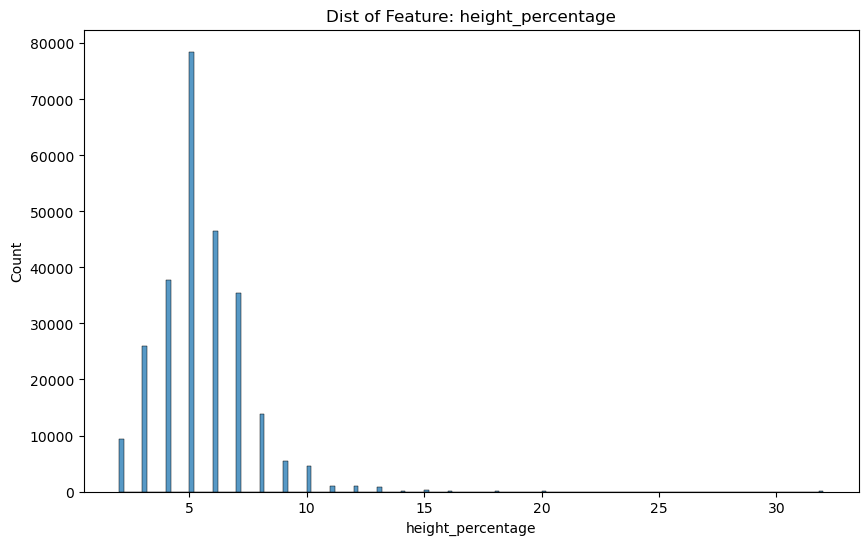

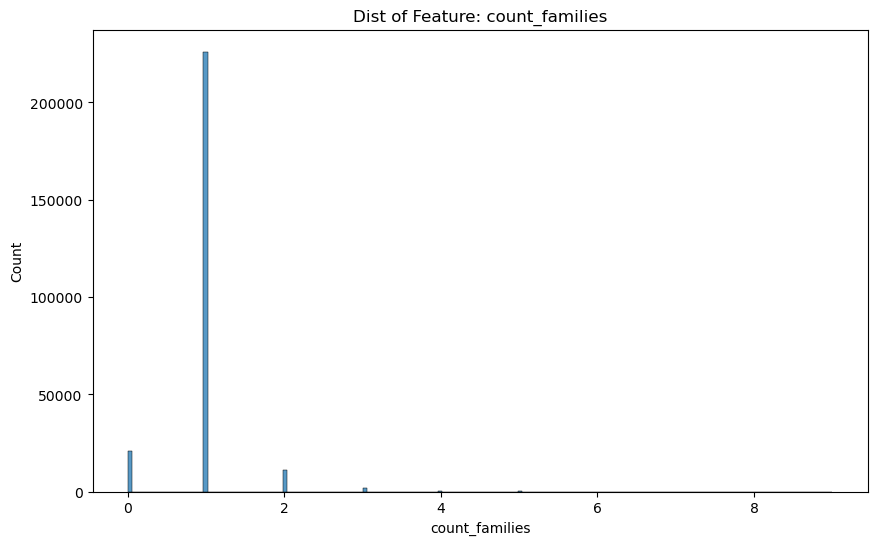

In [50]:
skew_vis(data=df, columns=uni_cols)

#### Standard Scaling Skewness

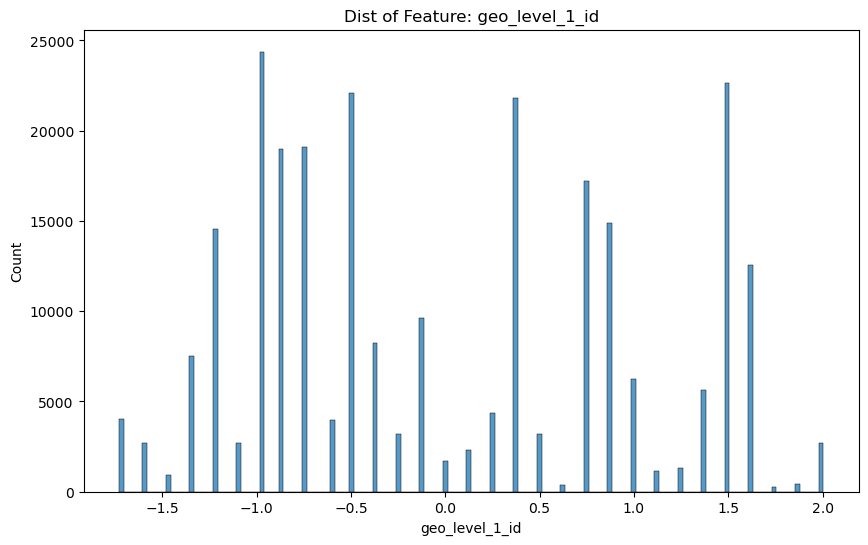

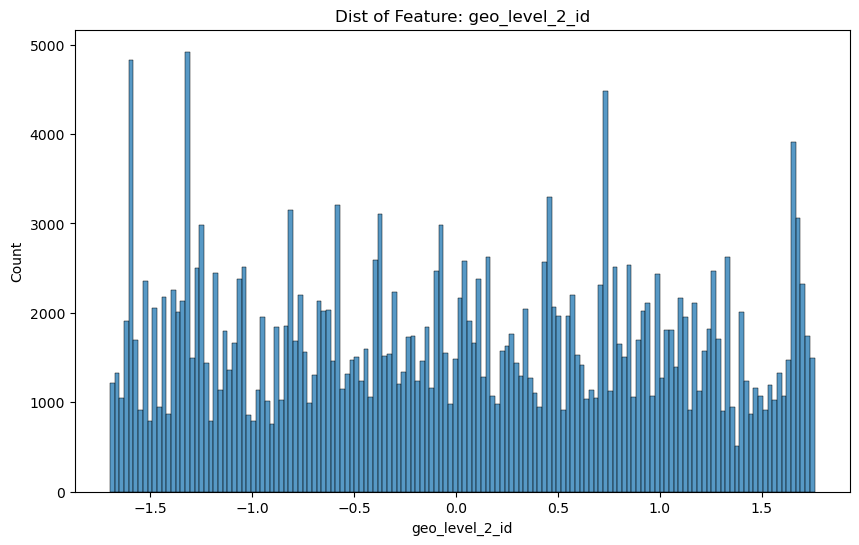

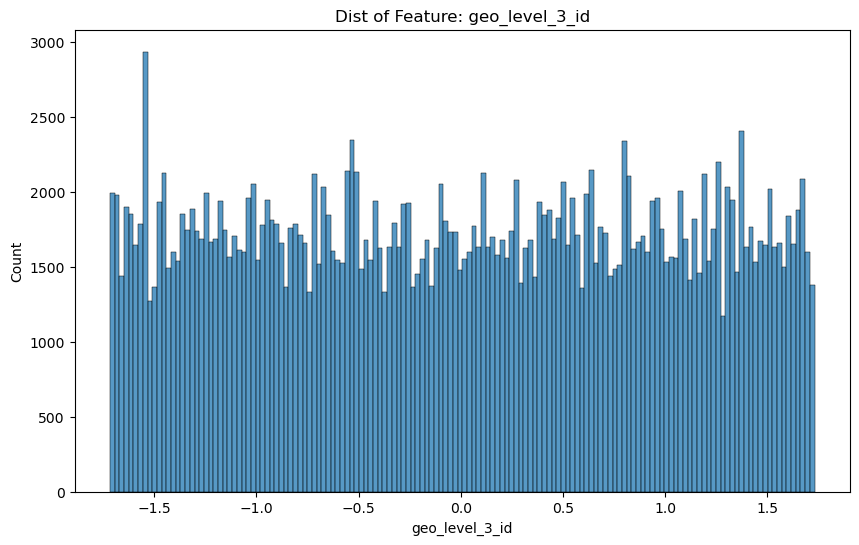

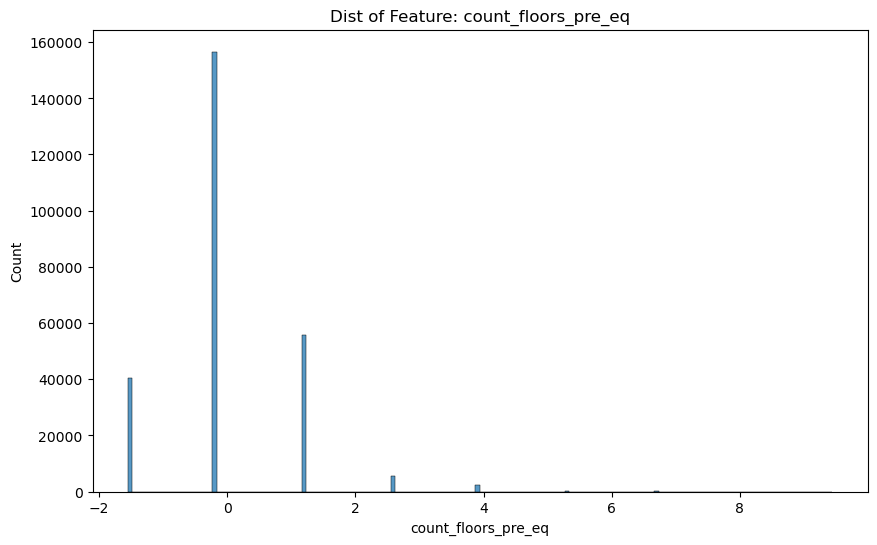

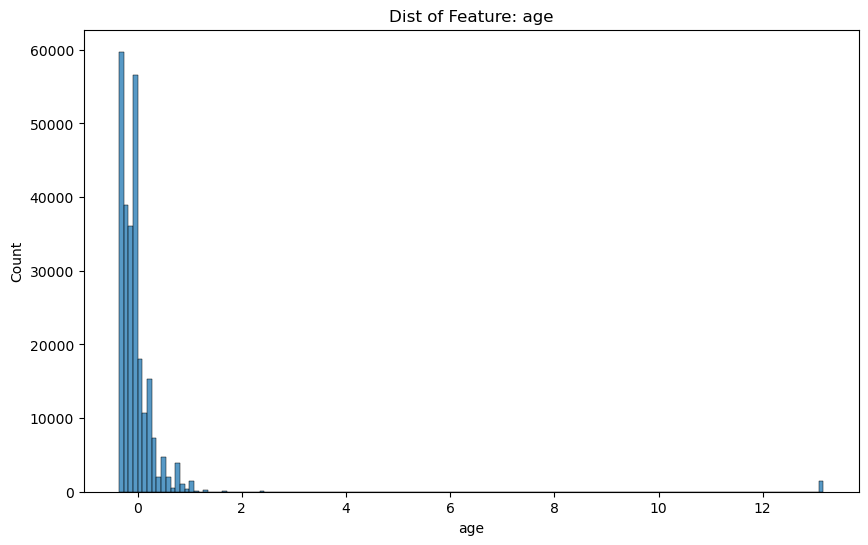

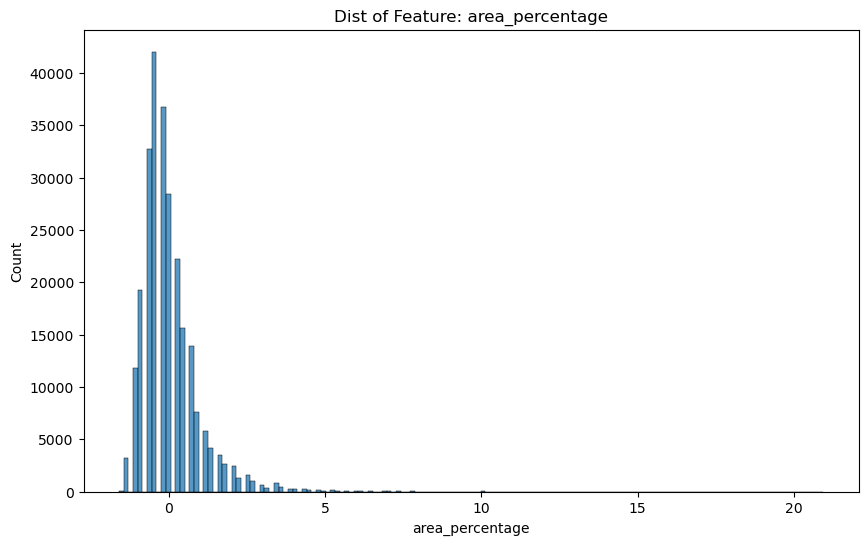

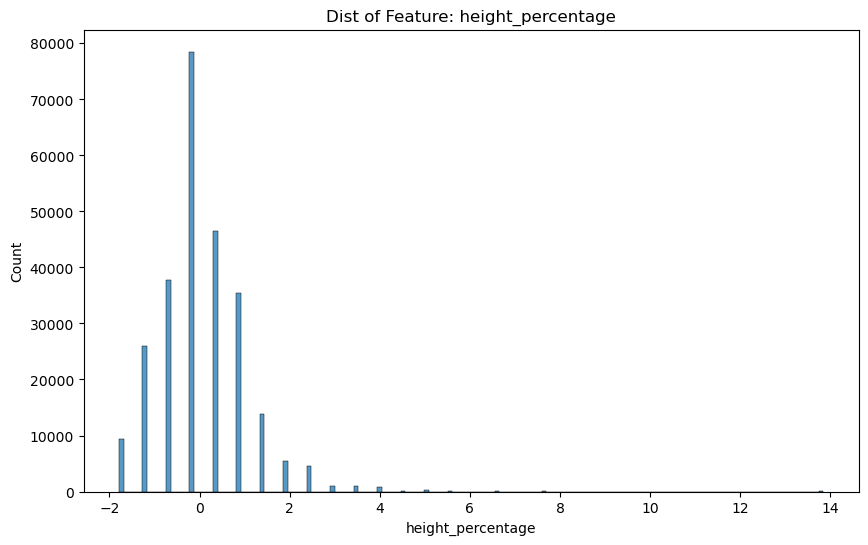

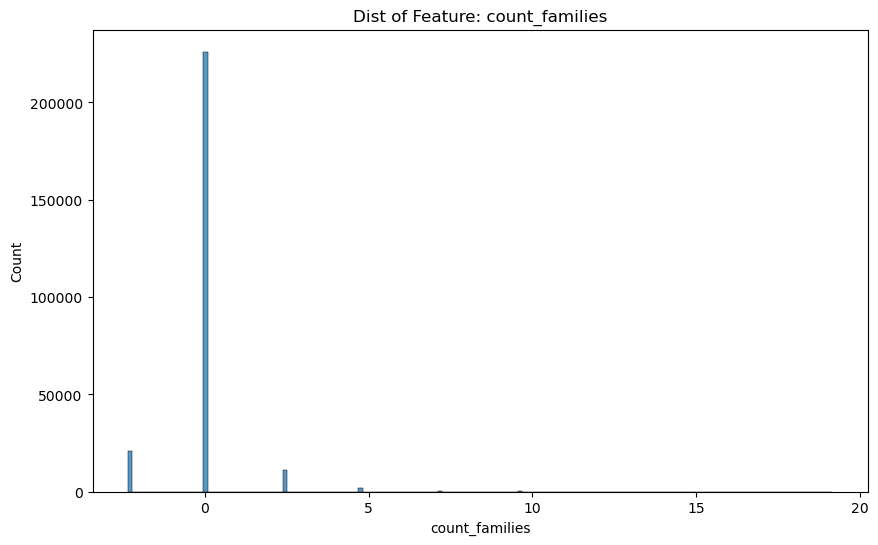

In [49]:
skew_vis(data=df_st_scaled, columns=uni_cols)

#### Robust Scaling Skewness

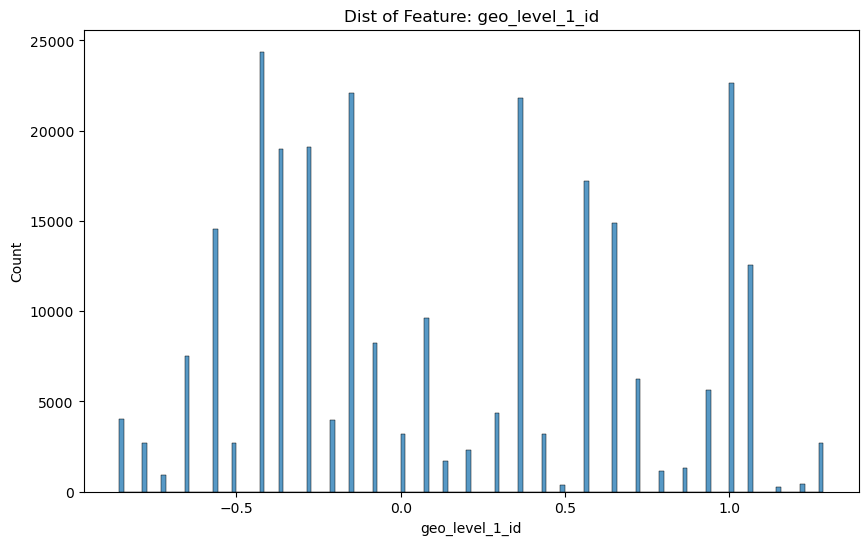

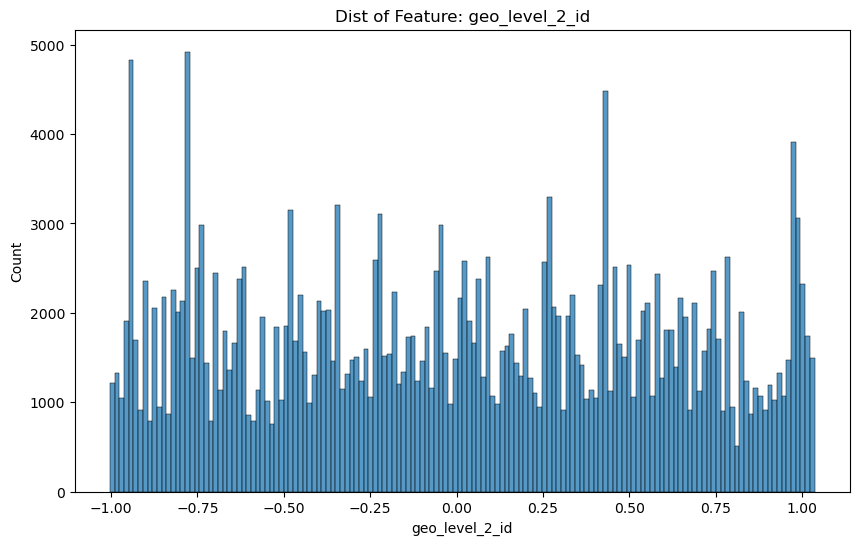

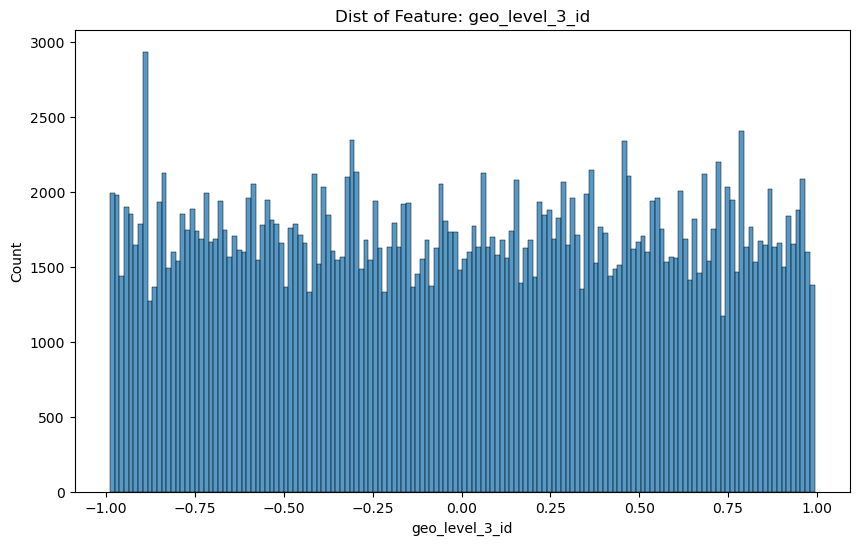

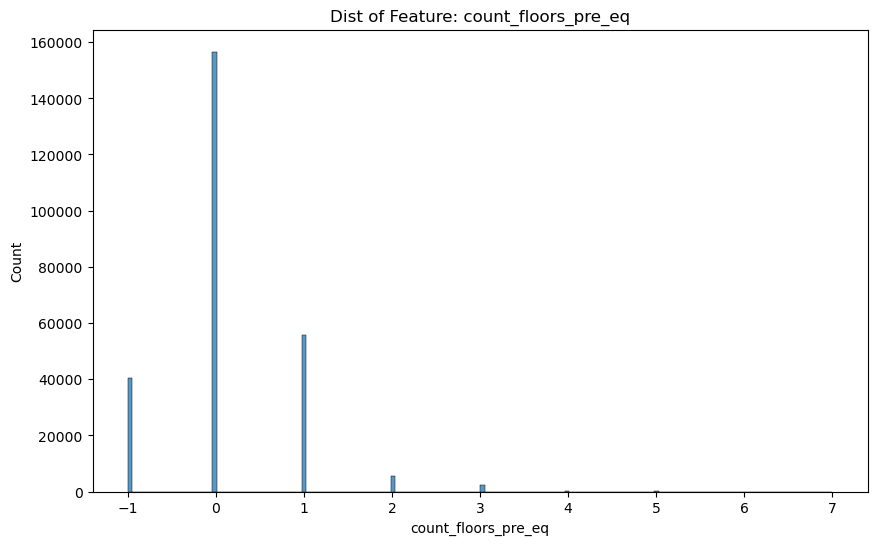

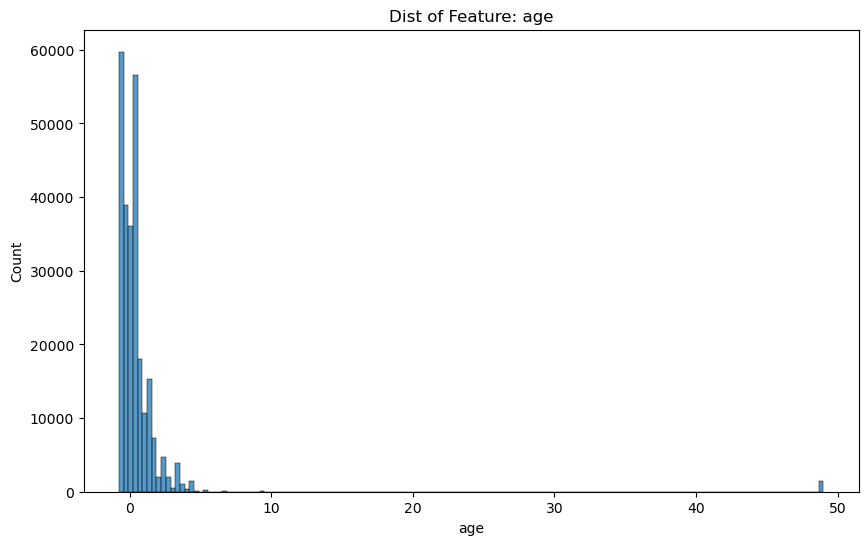

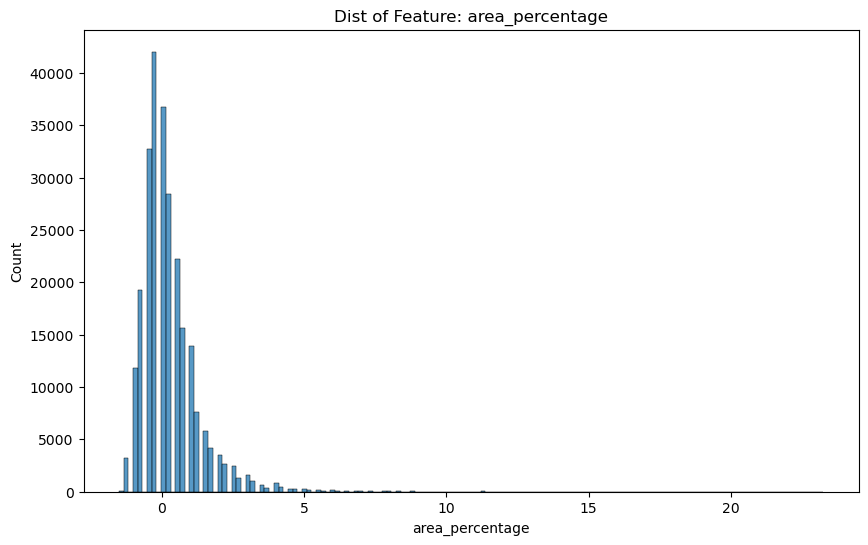

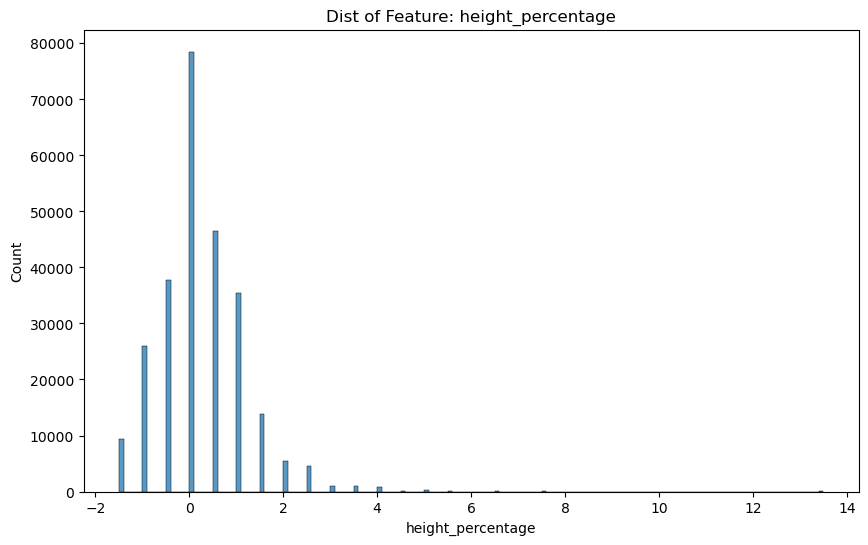

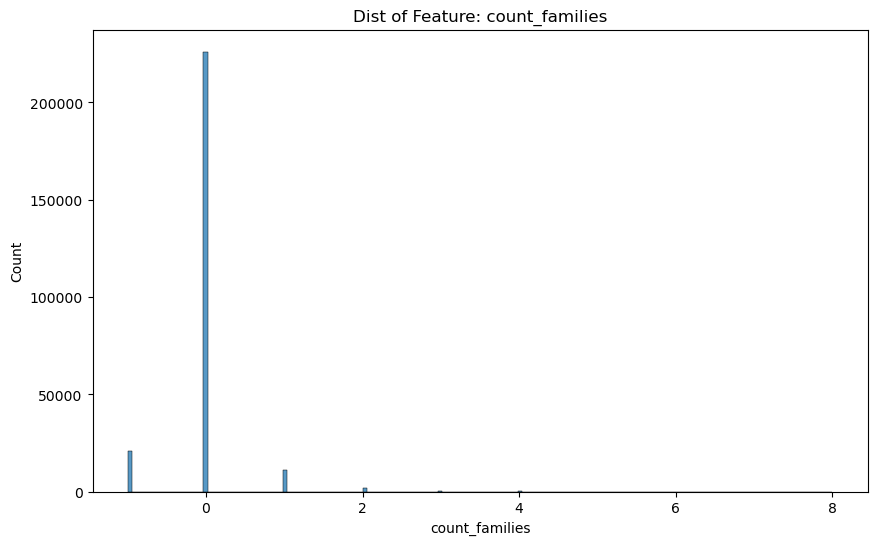

In [46]:
skew_vis(data=df_rb_scaled, columns=uni_cols) # Robust scaled skewness of data

#### MinMax Scaled Skewness

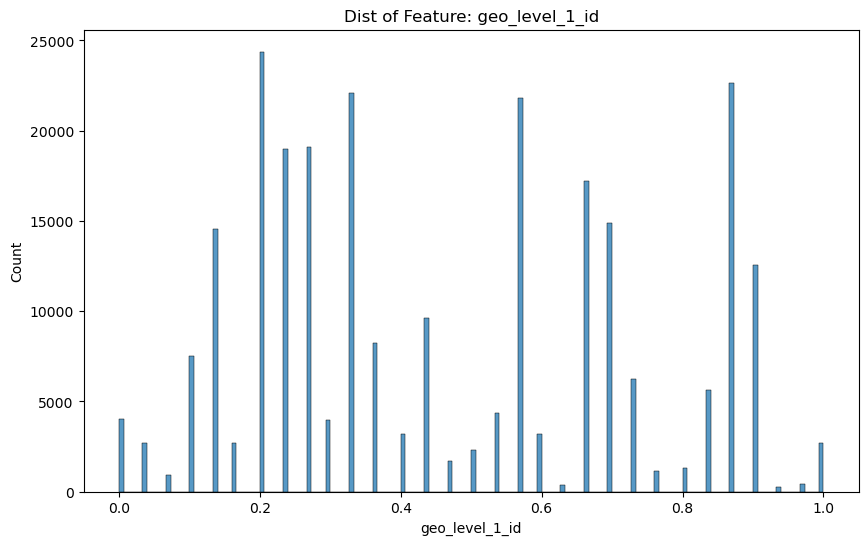

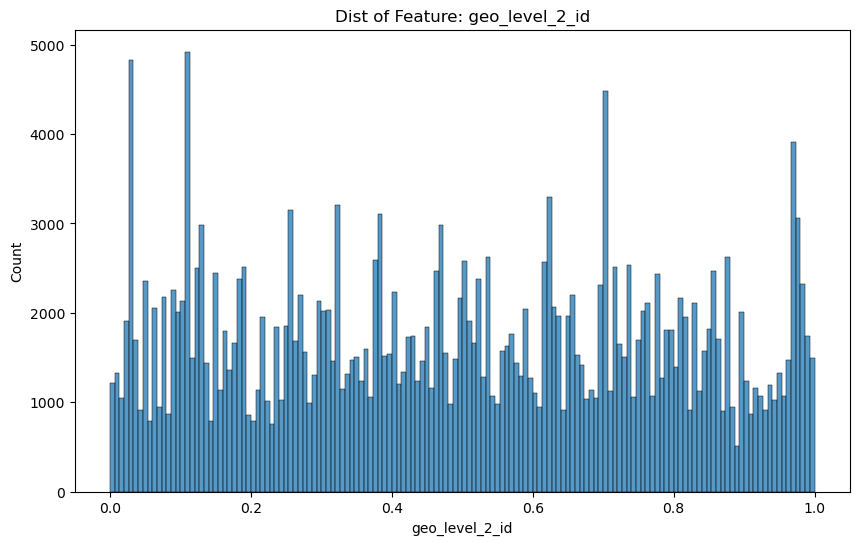

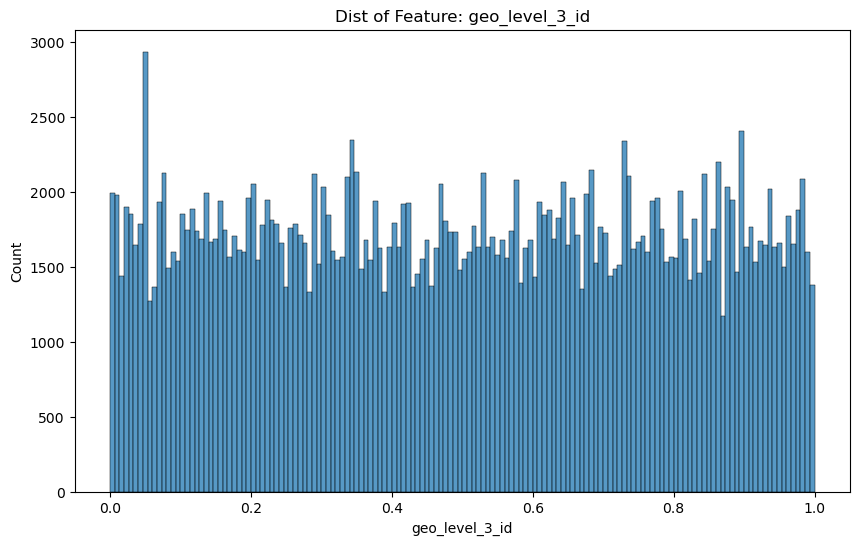

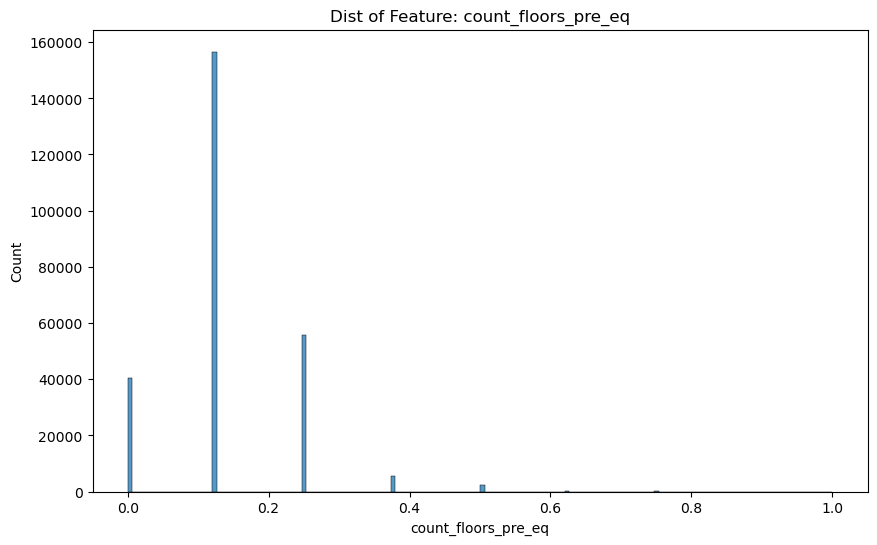

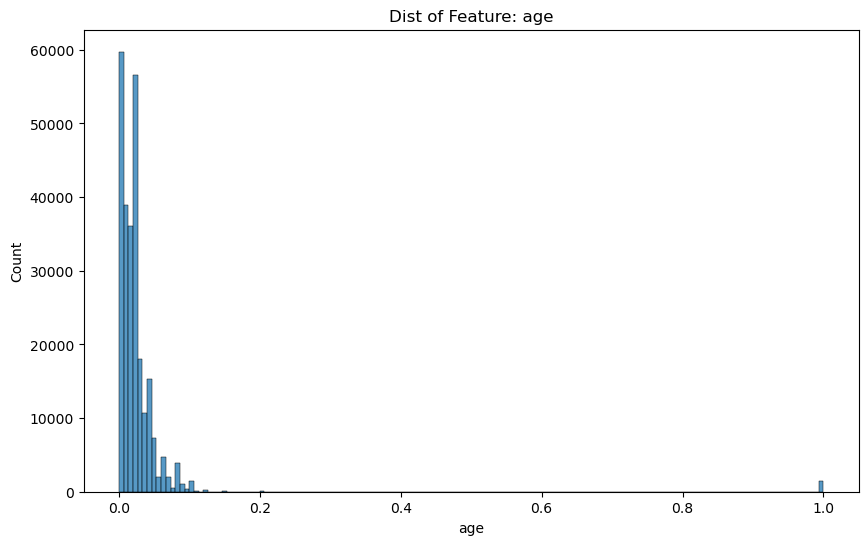

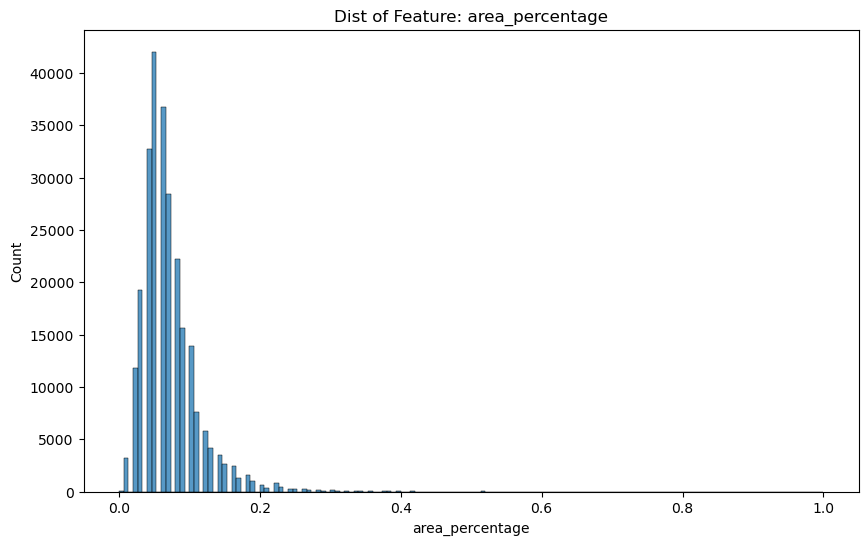

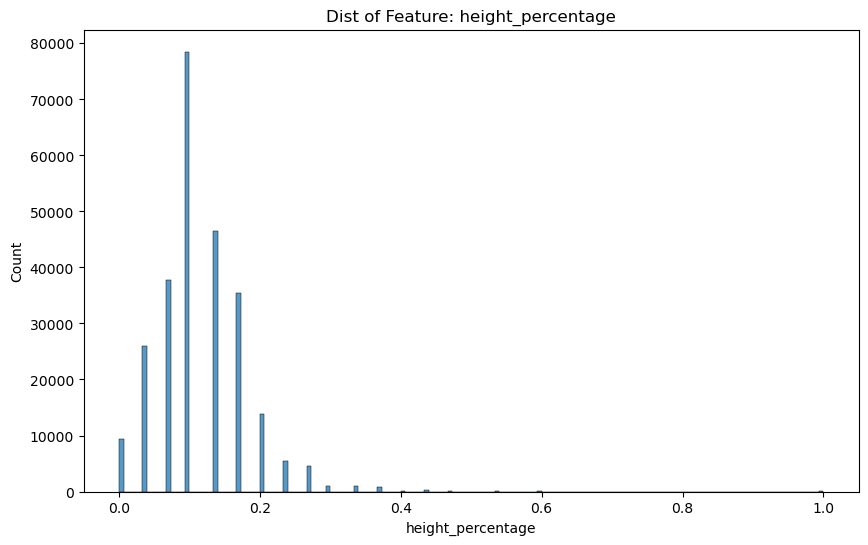

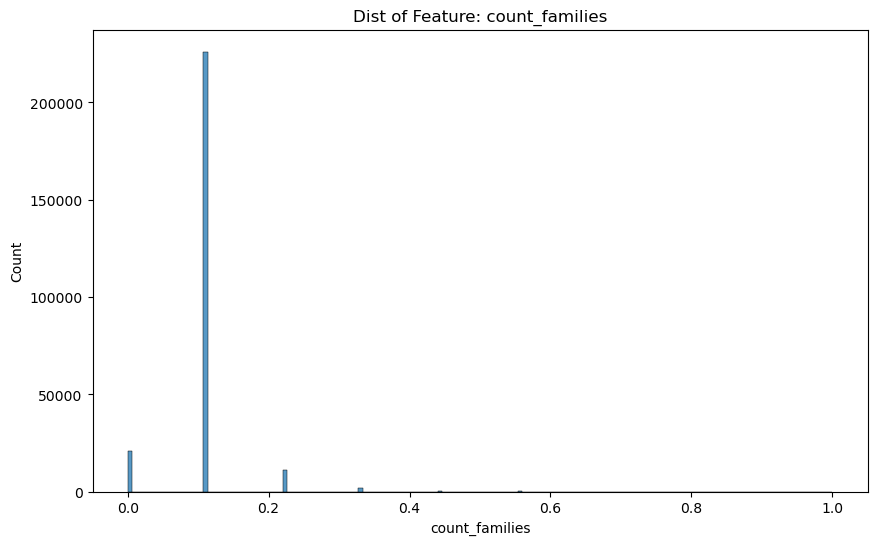

In [57]:
skew_vis(data=df_mm_scaled, columns=uni_cols)